In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [43]:
data = pd.read_csv("results/A/A_f_4_d_5.csv")
data

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism
0,0,10,1000,0.000000,0.000000,1.000000,1.000000,NaN
1,1,10,995,0.019989,0.689594,1.000000,1.000000,1.233870
2,2,10,995,0.027357,1.088662,0.999928,0.999890,1.272488
3,3,10,1000,0.031452,1.204307,0.999930,0.999651,1.316735
4,4,10,1011,0.033281,1.204307,0.999608,0.998813,1.343509
...,...,...,...,...,...,...,...,...
9995,9995,3,1498,0.026435,248.186645,0.416301,0.428472,1.760474
9996,9996,3,1514,0.025398,248.186645,0.417160,0.424194,1.741675
9997,9997,3,1529,0.025297,248.186645,0.418093,0.423580,1.723600
9998,9998,3,1547,0.023780,248.186645,0.417347,0.421120,1.710334


In [44]:
dataframes = []

for type in ["A"]: # ["A", "D", "S"]:
    path = f"results/{type}/"
    for file in os.listdir(path):
        data = pd.read_csv(path + file).tail(1)
        parts = file.split(".")[0].split("_")
        data["f"] = int(parts[2])
        data["d"] = int(parts[4])
        # data["Egalitarianism"] = data["Egalitarianism"].fillna(0)
        dataframes.append(data)

dataframe = pd.concat(dataframes)
dataframe

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism,f,d
9999,9999,0,0,NaN,NaN,NaN,NaN,NaN,0,0
9999,9999,0,0,NaN,NaN,NaN,NaN,NaN,0,1
9999,9999,0,0,NaN,NaN,NaN,NaN,NaN,0,2
9999,9999,0,0,NaN,NaN,NaN,NaN,NaN,0,3
9999,9999,0,0,NaN,NaN,NaN,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...
9999,9999,1,2416,0.014039,244.489330,0.574403,0.625751,1.839490,7,5
9999,9999,2,2474,0.010543,365.025825,0.508335,0.640611,1.855506,7,6
9999,9999,3,2425,0.007818,316.632220,0.595611,0.653887,1.794845,7,7
9999,9999,2,2342,0.002505,317.054832,0.718960,0.647052,1.883480,7,8


In [45]:
sns.set_theme()
plt.figure()

dataframe = dataframe.pivot(index="f", columns="d", values="Egalitarianism")
# weirdly high value distorting data
dataframe.iloc[1].iloc[0] = 2.2
dataframe = dataframe.drop(0)
dataframe = dataframe.apply(lambda x: 1/x)
dataframe

d,0,1,2,3,4,5,6,7,8,9
f,,,,,,,,,,
1,0.454545,0.440394,0.456194,0.432387,0.427536,0.392906,0.484689,0.388019,0.387343,0.459469
2,0.652787,0.586735,0.561191,0.551107,0.620597,0.474889,0.538697,0.535103,0.540536,0.490606
3,0.666606,0.639588,0.623249,0.622787,0.650890,0.611372,0.626444,0.617899,0.616112,0.619472
4,0.602322,0.591326,0.586437,0.607504,0.598110,0.587925,0.596400,0.574849,0.572542,0.565328
5,0.536465,0.503868,0.549261,0.507859,0.524147,0.513255,0.532272,0.534956,0.514495,0.524817
6,0.449625,0.450093,0.477465,0.501707,0.498292,0.521199,0.512227,0.513670,0.506725,0.497398
7,0.502378,0.435298,0.461248,0.525120,0.539258,0.543629,0.538936,0.557151,0.530932,0.540784


<Figure size 640x480 with 0 Axes>

<Axes: xlabel='d', ylabel='f'>

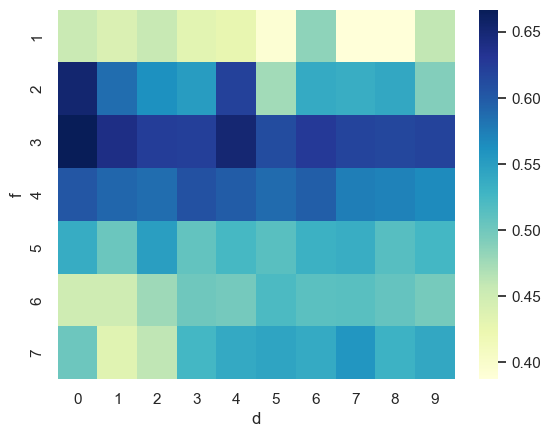

In [46]:
sns.heatmap(data=dataframe, cmap="YlGnBu")